
# Mathematic Operations on Datasets

**Gerd Duscher**

04/16/2020

**Please download this example and run it as a notebook by scrolling to the
bottom of this page**


In [1]:
# Ensure python 3 compatibility:
from __future__ import division, print_function, absolute_import, unicode_literals
%pylab notebook

import sys
sys.path.insert(0, '../../')
import sidpy

print(sidpy.__version__)

Populating the interactive namespace from numpy and matplotlib
0.0.8


## Creating an Image Datset
First, we make a sidpy dataset from a numpy array, with all the information to plot it. 

<IPython.core.display.Javascript object>


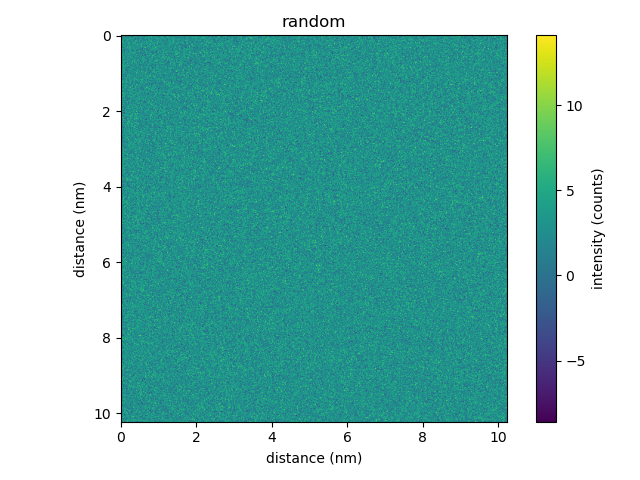

In [3]:
x = np.random.normal(3, 2.5, size=(512, 512))
dset = sidpy.Dataset.from_array(x)
dset.data_type = 'image'
dset.units = 'counts'
dset.quantity = 'intensity'
dset.title = 'random'
dset.set_dimension(0, sidpy.Dimension(np.arange(dset.shape[0])*.02, 'x'))
dset.x.dimension_type = 'spatial'
dset.x.units = 'nm'
dset.x.quantity = 'distance'
dset.set_dimension(1, sidpy.Dimension(np.arange(dset.shape[1])*.02, 'y'))
dset.y.dimension_type = 'spatial'
dset.y.units = 'nm'
dset.y.quantity = 'distance'
view = dset.plot()

## Simple Arithmetic 

First we subtract the min of this image, and we want to have the rest of the information unchanged

So we use the minimum function and do a subtraction.


<IPython.core.display.Javascript object>


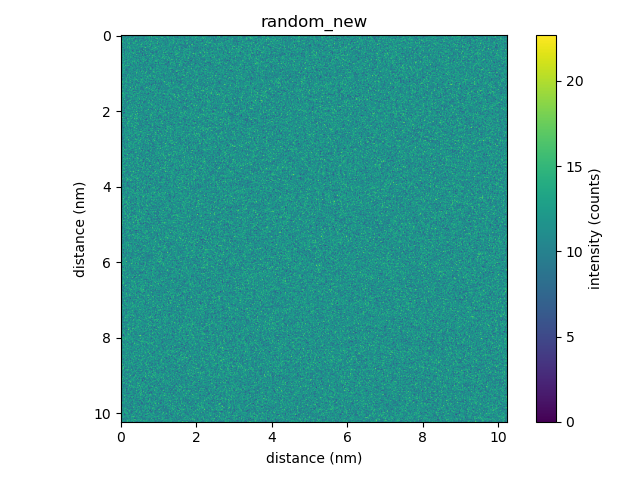

sidpy.Dataset of type IMAGE with:
 dask.array<sub, shape=(512, 512), dtype=float64, chunksize=(512, 512), chunktype=numpy.ndarray>
 data contains: intensity (counts)
 and Dimensions: 
x:  distance (nm) of size (512,)
y:  distance (nm) of size (512,)


sidpy.Dataset of type IMAGE with:
 dask.array<sub, shape=(512, 512), dtype=float64, chunksize=(512, 512), chunktype=numpy.ndarray>
 data contains: intensity (counts)
 and Dimensions: 
x:  distance (nm) of size (512,)
y:  distance (nm) of size (512,)

In [4]:
dset = dset - dset.min()
view = dset.plot()
print(dset)
dset

## Operations on 3 Dimensional Datasets

### First we make a stack of images

(20, 512, 512)


<IPython.core.display.Javascript object>


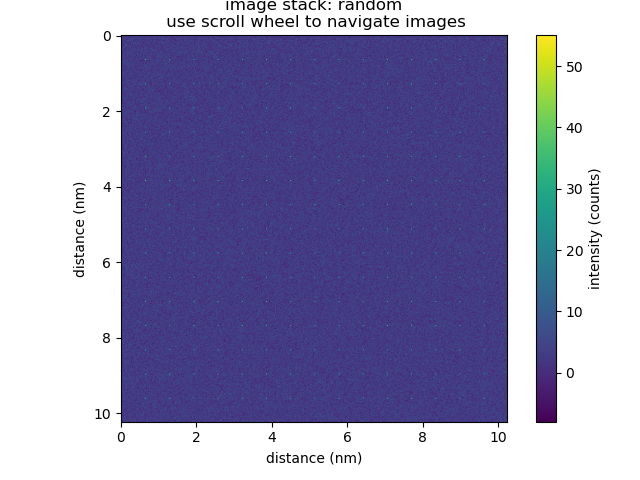

In [5]:
imput_stack = np.random.normal(3, 2.5, size=(20, 512, 512))
x, y = np.mgrid[0:16, 0:16] * 32
imput_stack[:, x, y] = 55.
dset = sidpy.Dataset.from_array(imput_stack)
print(dset.shape)
dset.data_type = 'image_stack'
dset.units = 'counts'
dset.quantity = 'intensity'
dset.title = 'random'
dset.set_dimension(0, sidpy.Dimension(np.arange(dset.shape[0])*.02, 'frames'))
dset.frames.dimension_type = 'temporal'
dset.set_dimension(1, sidpy.Dimension(np.arange(dset.shape[1])*.02, 'x'))
dset.x.dimension_type = 'spatial'
dset.x.units = 'nm'
dset.x.quantity = 'distance'
dset.set_dimension(2, sidpy.Dimension(np.arange(dset.shape[2])*.02, 'y'))
dset.y.dimension_type = 'spatial'
dset.y.units = 'nm'
dset.y.quantity = 'distance'
view = dset.plot()

### Plottting a summed image

If we sum over an axis, we reduce the dimensionality and so we only have to supply the ``data_type`` of the new dataset.

<IPython.core.display.Javascript object>


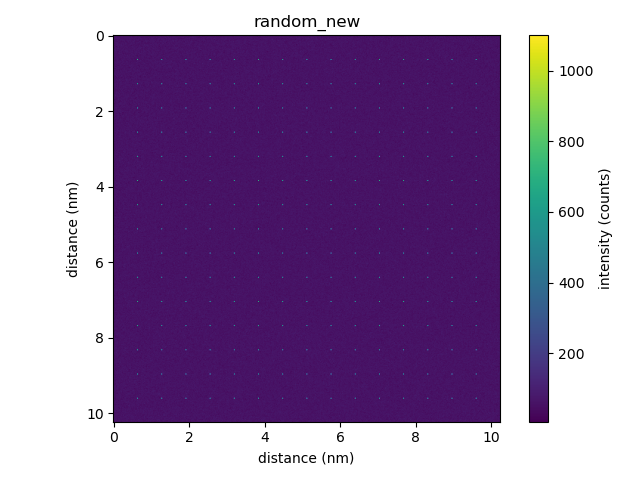

In [6]:
summed_image = dset.sum(axis=0)
summed_image.data_type = 'image'
view = summed_image.plot()

## Power Spectrum of Dataset

The ``power spectrum`` is the magnitude of the Fourier transform of a dataset.

The magnitude of a complex number is just it's absolute and so we just dasiy-chain the ``fft`` and ``abs`` function to obtain a power spectrum.

>
> Please note that the Fourier Transform is dependent on the data_type of the dataset.
>

<IPython.core.display.Javascript object>


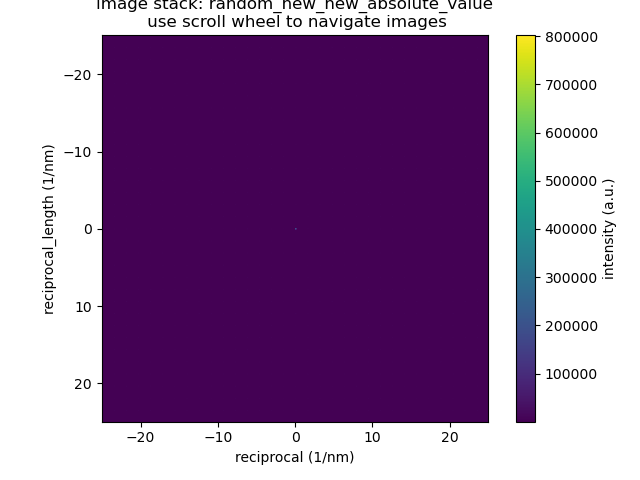

In [8]:
fft_image = dset.fft().abs()
fft_image.plot()
view = fft_image

## Numpy Functionality

Also numpy functions on a sidpy datset will return a sidpy dataset.

Let's use the log function of numpy to make the power spectrum better visible.

<IPython.core.display.Javascript object>


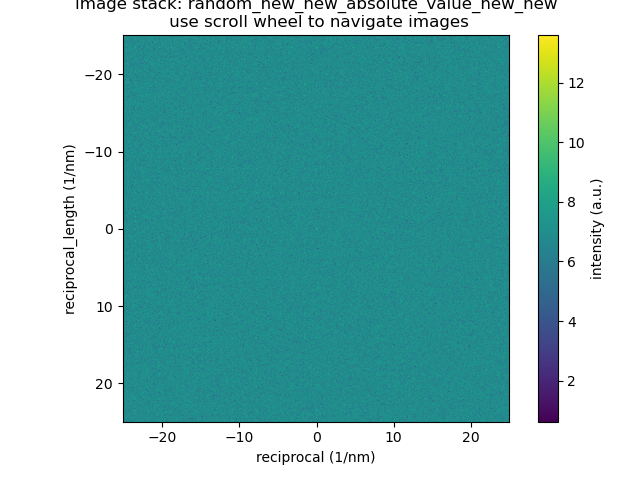

In [9]:
fft_image = dset.fft().abs()
fft_image = np.log(1+fft_image)

view = fft_image.plot()

Works also in daisy-chain.


<IPython.core.display.Javascript object>


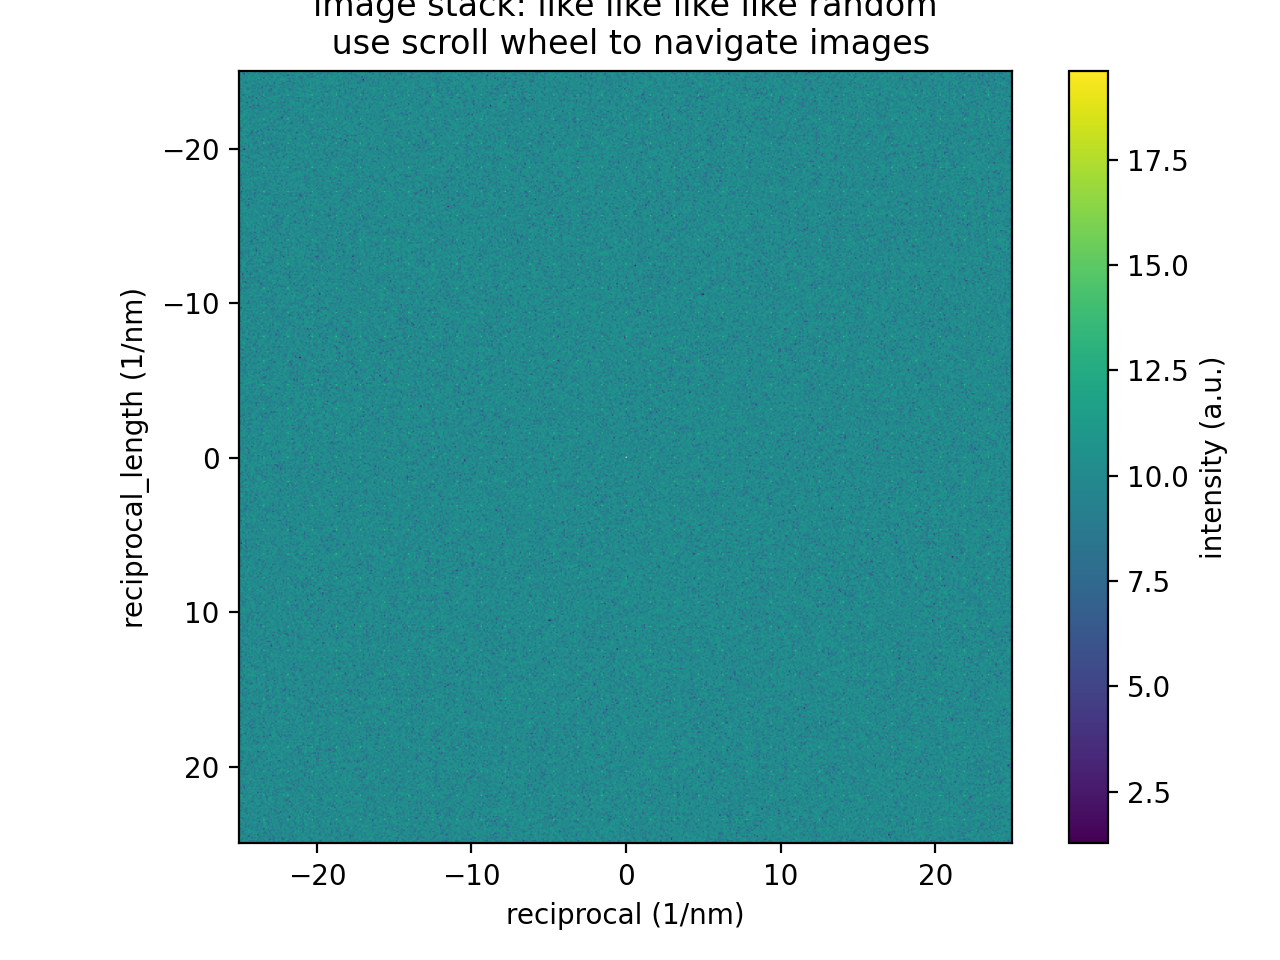

In [100]:
fft_image = np.log2(1+dset.fft().abs())

fft_image.plot()

## All together

Please not that you need to specify the data_type, whenever you change the number of dimensions.

<IPython.core.display.Javascript object>


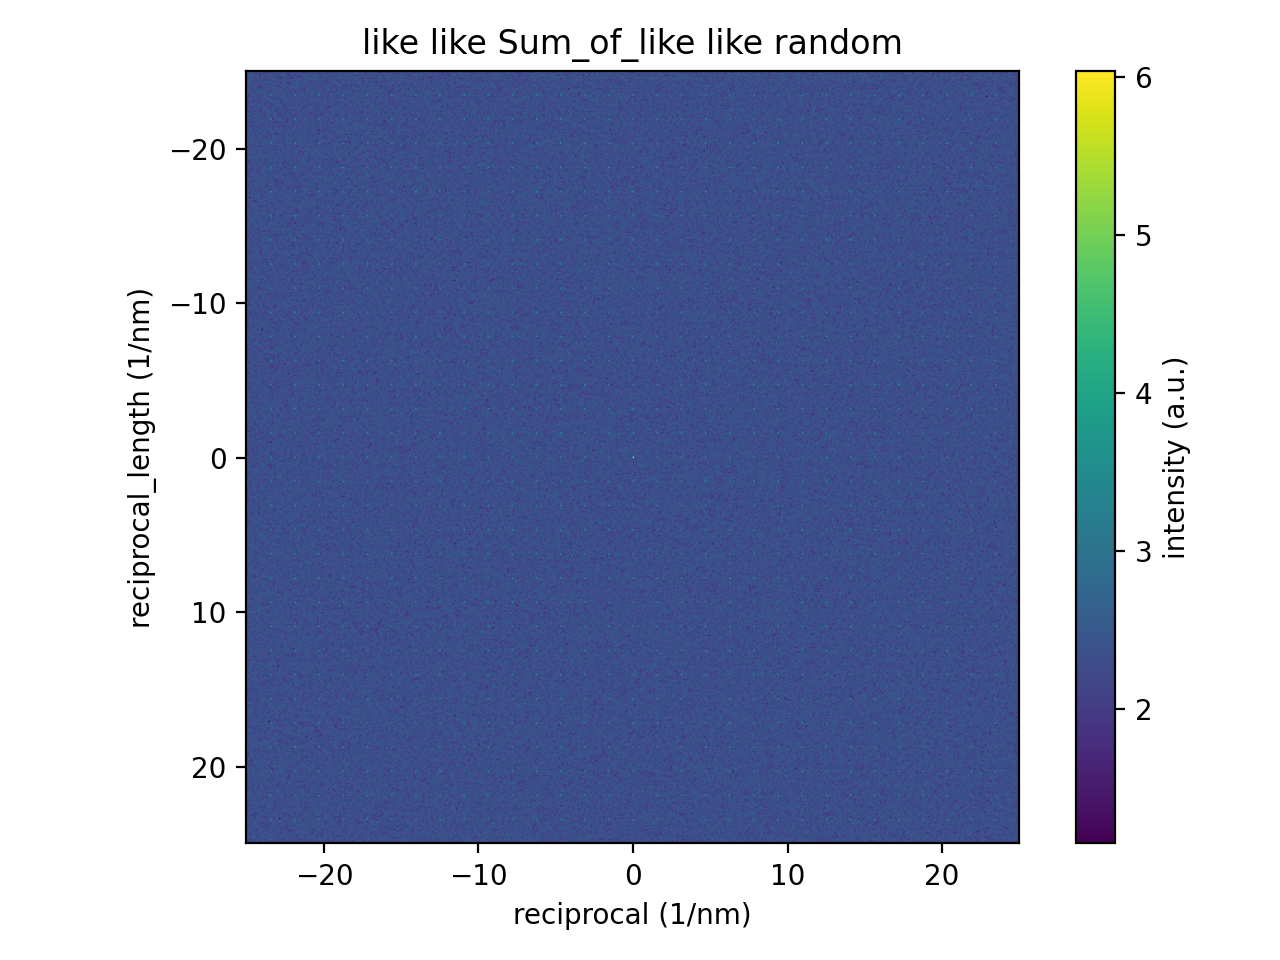

In [101]:
fft_image = np.power((dset-dset.min()).fft().sum(axis=0).abs(), 0.1)
fft_image.data_type = 'image'
fft_image.plot()

<IPython.core.display.Javascript object>


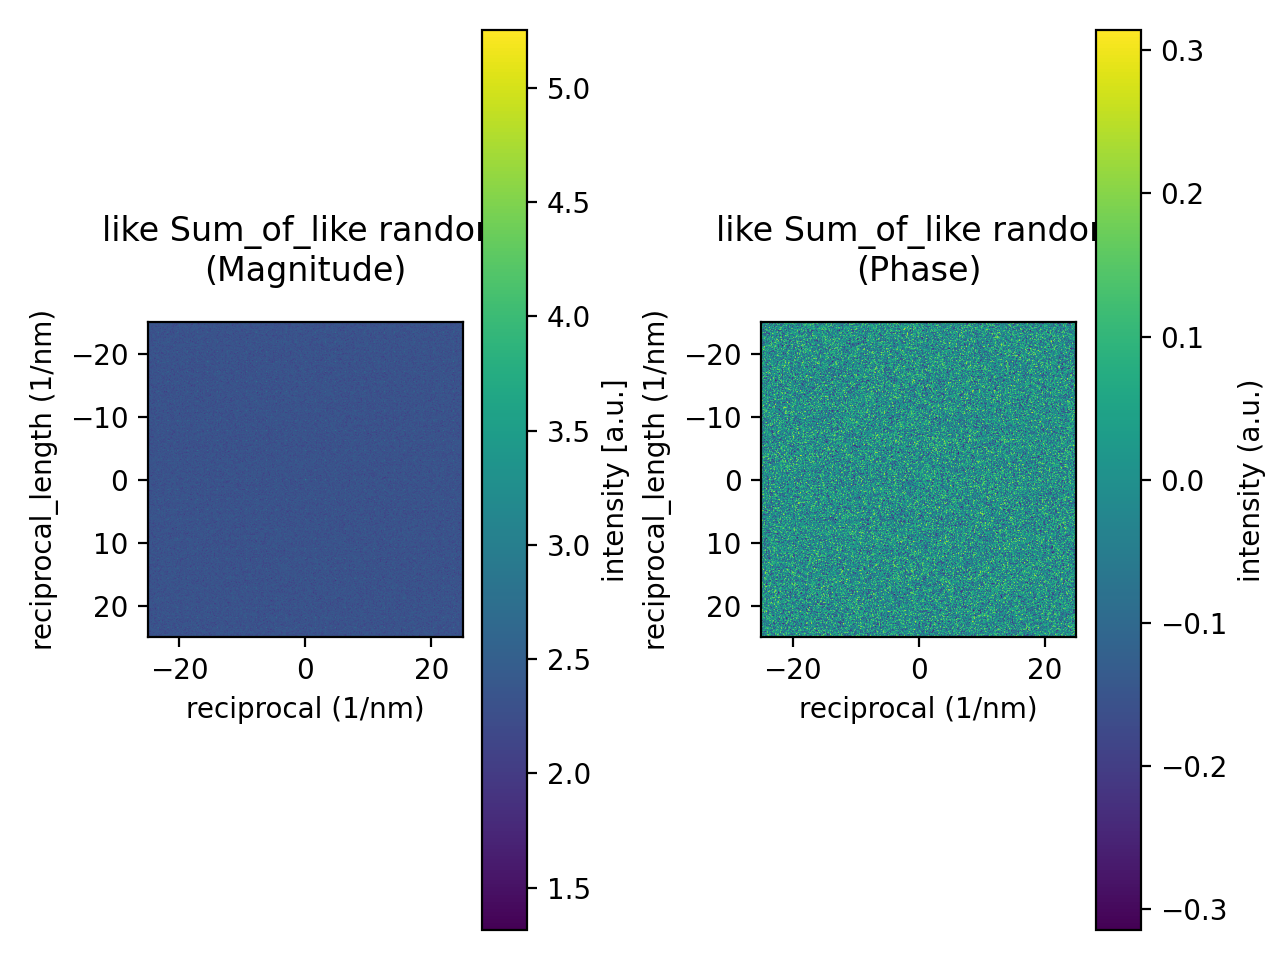

sidpy.Dataset of type IMAGE with:
 dask.array<like Sum_of_like random, shape=(512, 512), dtype=complex128, chunksize=(512, 512), chunktype=numpy.ndarray>
 data contains: intensity (a.u.)
 and Dimensions: 
u:  reciprocal (1/nm) of size (512,)
v:  reciprocal_length (1/nm) of size (512,)


sidpy.Dataset of type IMAGE with:
 dask.array<like Sum_of_like random, shape=(512, 512), dtype=complex128, chunksize=(512, 512), chunktype=numpy.ndarray>
 data contains: intensity (a.u.)
 and Dimensions: 
u:  reciprocal (1/nm) of size (512,)
v:  reciprocal_length (1/nm) of size (512,)

In [51]:
fft_image = np.power(dset.fft().sum(axis=0), 0.1)
fft_image.data_type = 'image'
fft_image.plot()

print(fft_image)
fft_image

## Fourier Transform of Different data_types

### Spectrum

<IPython.core.display.Javascript object>


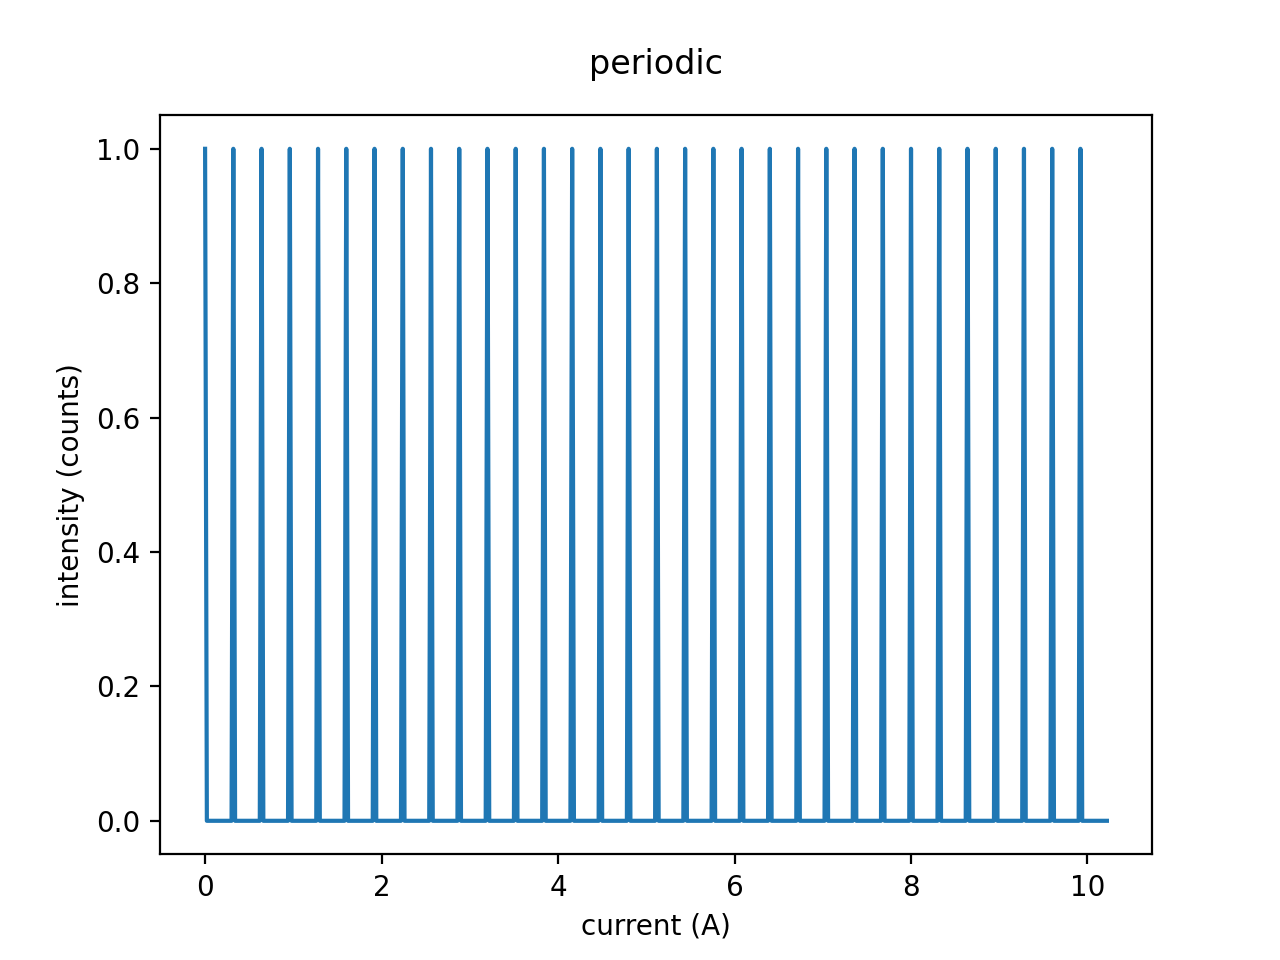

In [58]:
input_spectrum = np.zeros([512])
x = np.mgrid[0:32] * 16
input_spectrum[x] = 1

dataset = sidpy.Dataset.from_array(input_spectrum)
dataset.data_type = 'spectrum'
dataset.units = 'counts'
dataset.quantity = 'intensity'
dataset.title = 'periodic'

dataset.set_dimension(0, sidpy.Dimension(np.arange(dataset.shape[0]) * .02, 'x'))
dataset.x.dimension_type = 'spectral'
dataset.x.units = 'A'
dataset.x.quantity = 'current'

dataset.plot()

Power Spectrum

<IPython.core.display.Javascript object>


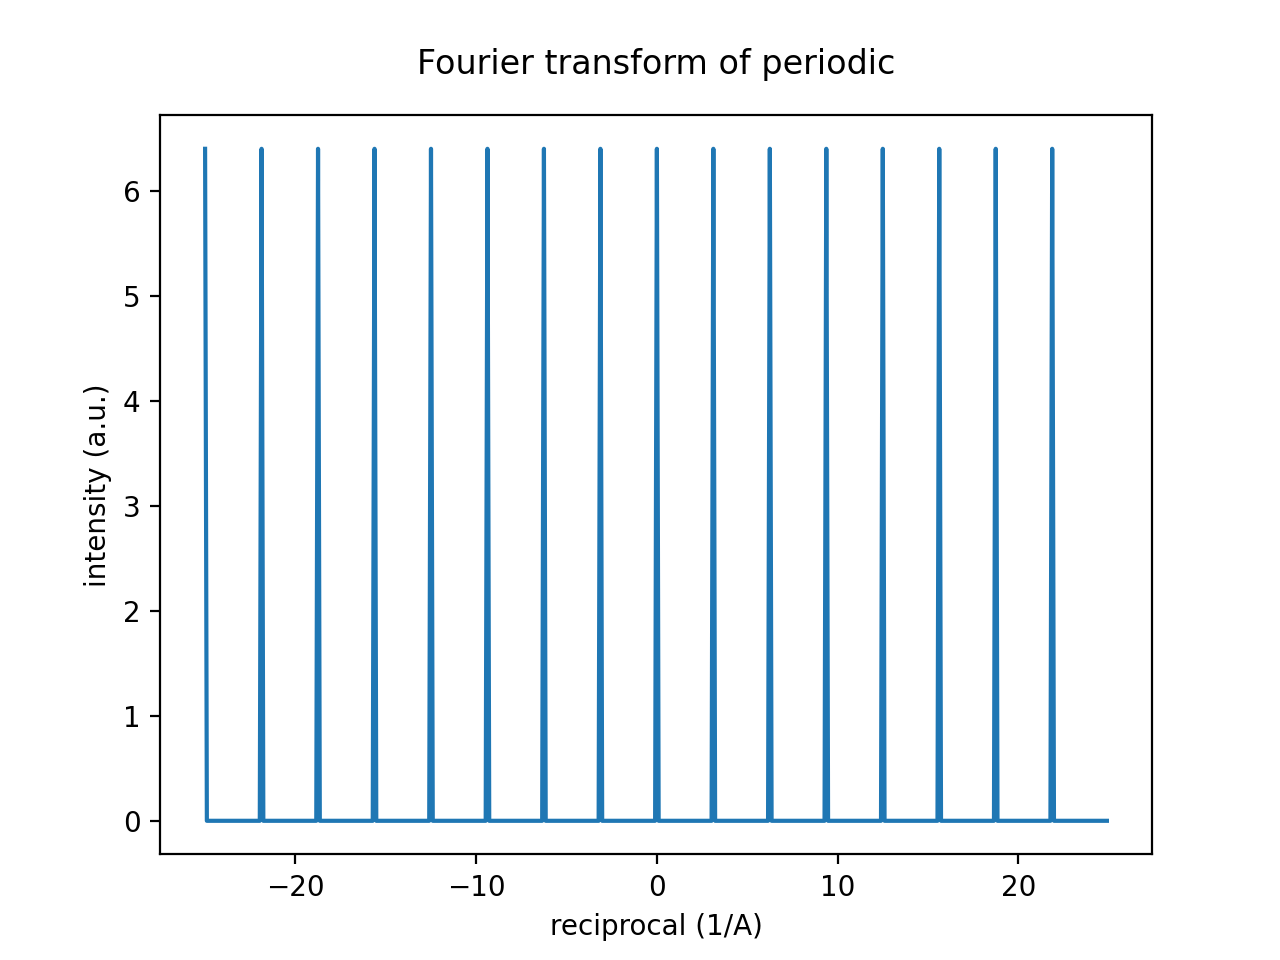

In [61]:
fft_dataset = dataset.fft().abs()/5
fft_dataset.title= 'Fourier transform of ' + dataset.title
fft_dataset.plot()

### Spectrum Image

<IPython.core.display.Javascript object>


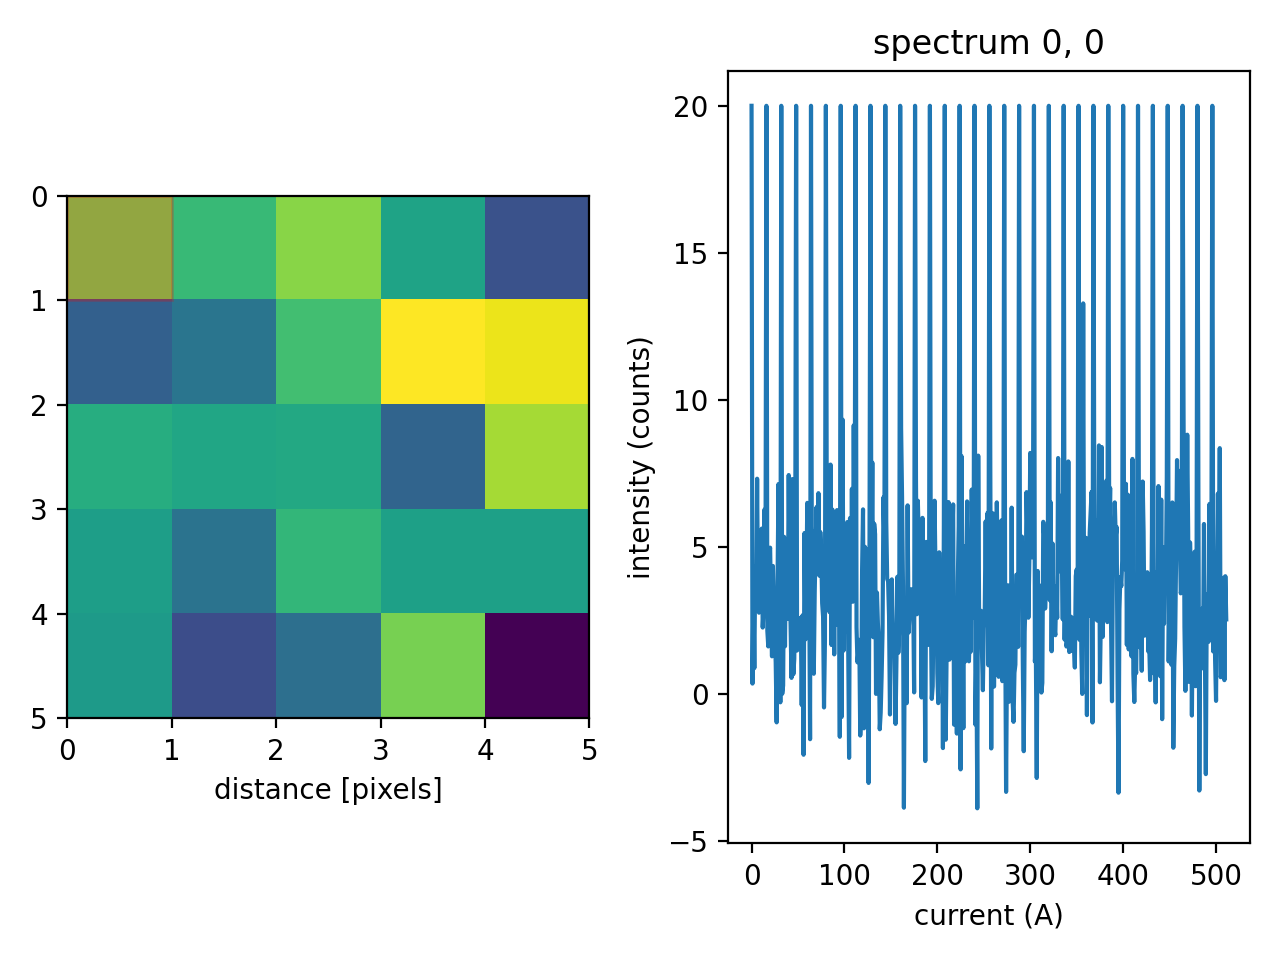

../..\sidpy\viz\dataset_viz.py:484: MatplotlibDeprecationWarning: 
The set_window_title function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use manager.set_window_title or GUI-specific methods instead.
  self.fig.canvas.set_window_title(self.dset.title)


In [90]:
input_si = np.random.normal(3, 2.5, size=( 5, 5, 512,))

x = np.mgrid[0:32] * 16
input_si[ :, :, x] = 20.

dset = sidpy.Dataset.from_array(input_si)
dset.data_type = 'spectral_image'
dset.units = 'counts'
dset.quantity = 'intensity'

dset.set_dimension(0, sidpy.Dimension(np.arange(dset.shape[0])*.02, 'x'))
dset.x.dimension_type = 'spatial'
dset.x.units = 'nm'
dset.x.quantity = 'distance'
dset.set_dimension(1, sidpy.Dimension(np.arange(dset.shape[1])*.02, 'y'))
dset.y.dimension_type = 'spatial'
dset.y.units = 'nm'
dset.y.quantity = 'distance'

dset.set_dimension(2, sidpy.Dimension(np.arange(dset.shape[2]),'spectrum'))
dset.spectrum.dimension_type = 'spectral'
dset.spectrum.units = 'A'
dset.spectrum.quantity = 'current'

dset.plot()

And the Fourier Transform

please note that we need to define the datset here or we will not have a good reference for the plot and loose interactivity immediately.

<IPython.core.display.Javascript object>


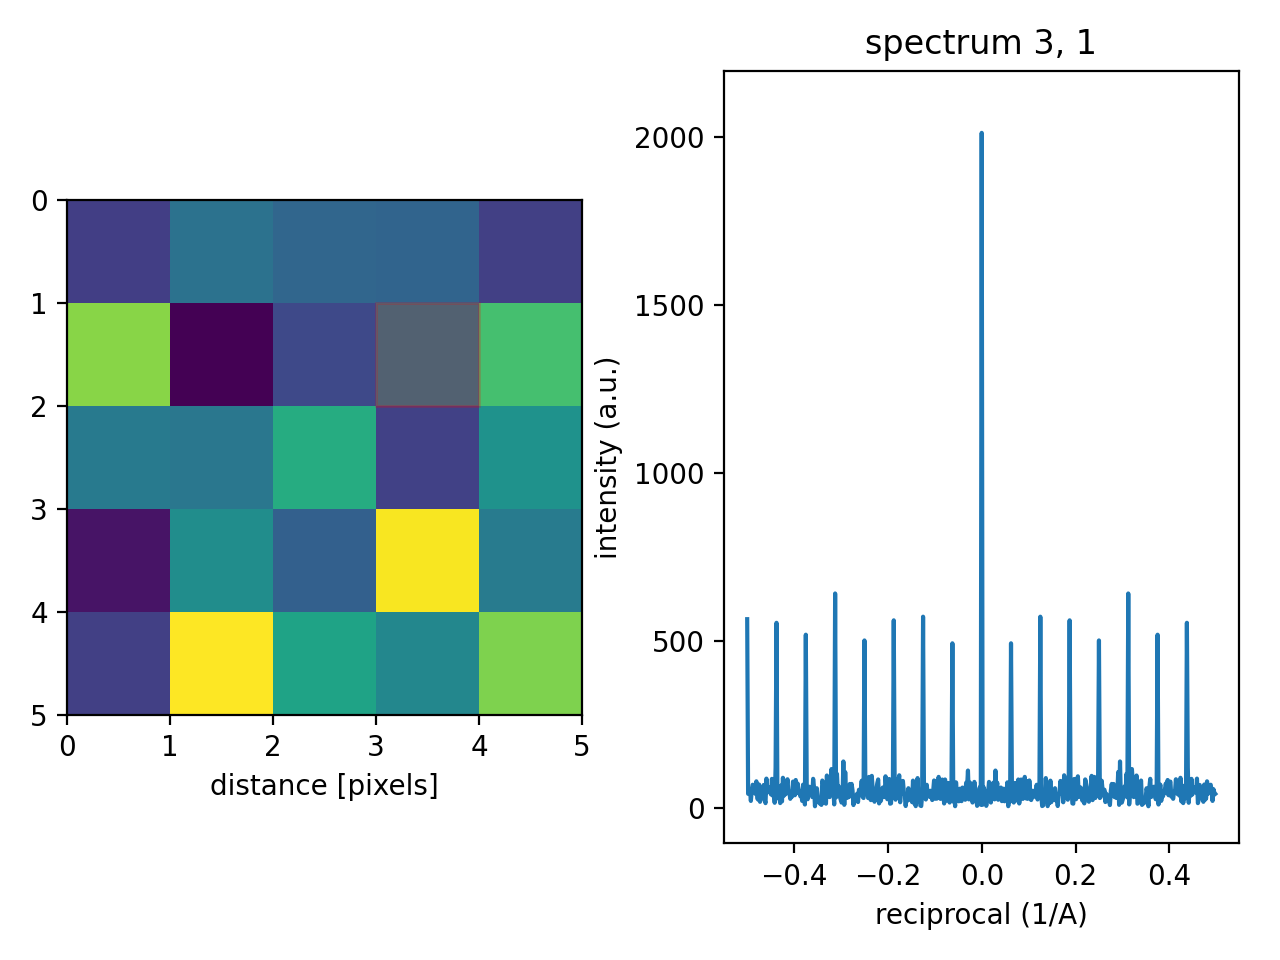

../..\sidpy\viz\dataset_viz.py:484: MatplotlibDeprecationWarning: 
The set_window_title function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use manager.set_window_title or GUI-specific methods instead.
  self.fig.canvas.set_window_title(self.dset.title)


In [91]:
fft_si = dset.fft().abs()
fft_si.plot()

## Summary

Basic operators and numpy operators will return a sidpy dataset.
